In [1]:
#import the files required
from google.colab import files
import io
uploaded =files.upload()
for fn in uploaded.keys():
   print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving HousingData.csv to HousingData.csv
User uploaded file "HousingData.csv" with length 35008 bytes


In [2]:
#Load the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#read the data from the file
housing_data = pd.read_csv('HousingData.csv')
print("Rows, columns: " + str(housing_data.shape))

Rows, columns: (506, 14)


In [4]:
housing_data.sample(10) 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
330,0.04544,NaN,3.24,0.0,0.460,6.144,32.2,5.8736,4,430,16.9,368.57,9.09,19.8
98,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
80,0.04113,25.0,4.86,0.0,0.426,6.727,33.5,5.4007,4,281,19.0,396.90,5.29,28.0
273,0.22188,20.0,6.96,1.0,0.464,7.691,51.8,4.3665,3,223,18.6,390.77,6.58,35.2
90,0.04684,0.0,3.41,0.0,0.489,6.417,66.1,3.0923,2,270,17.8,392.18,8.81,22.6
429,9.33889,0.0,18.10,0.0,0.679,6.380,NaN,1.9682,24,666,20.2,60.72,24.08,9.5
286,0.01965,80.0,1.76,0.0,0.385,6.230,NaN,9.0892,1,241,18.2,341.60,12.93,20.1
152,1.12658,0.0,19.58,NaN,0.871,5.012,88.0,1.6102,5,403,14.7,343.28,12.12,15.3
213,0.14052,0.0,10.59,0.0,0.489,6.375,32.3,3.9454,4,277,18.6,385.81,9.38,28.1
243,0.12757,30.0,4.93,0.0,0.428,6.393,7.8,7.0355,6,300,16.6,374.71,5.19,23.7


#Statistical analysis

In [5]:
housing_data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [6]:
housing_data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

We can see that there are columns that have missing values which are 'CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT'.

In [7]:
housing_data.describe() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
housing_data.rename(columns={'MEDV':'PRICE'}, inplace=True)

#Box plot for Boston housing data

Here we can see that the variables ‘chas’, 'TAX' and ‘rad’ are non numeric others are numeric.

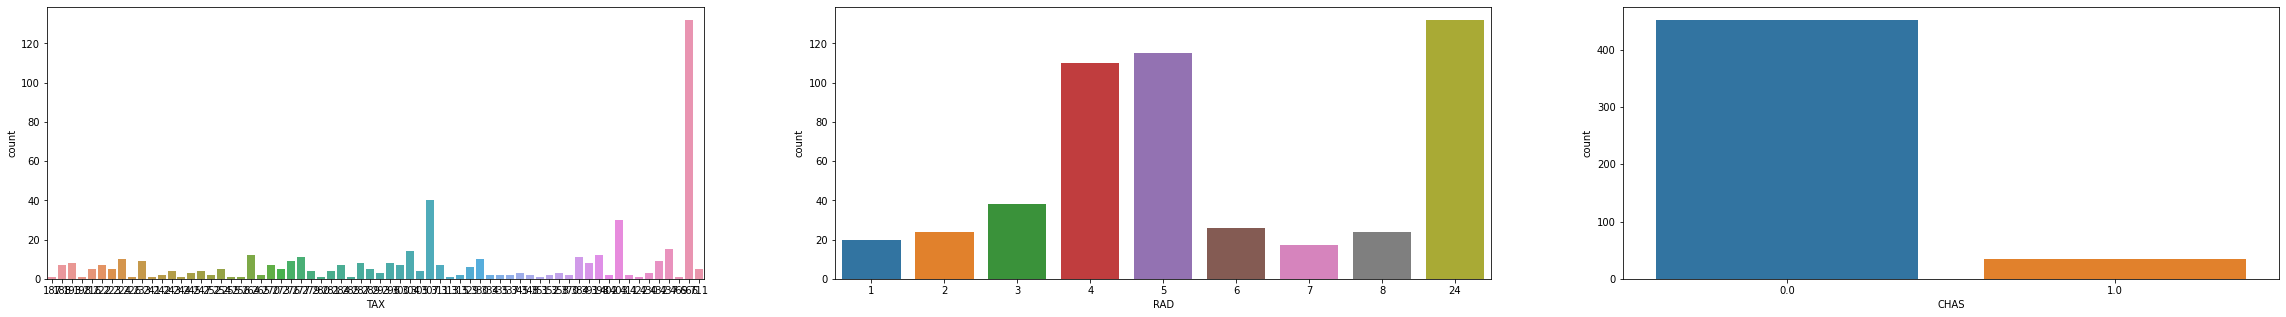

In [9]:
fig = plt.figure(figsize=(40,5))
features = ["TAX","RAD","CHAS"]
for i in range(3):
    ax1 = fig.add_subplot(1,3,i+1)
    sns.countplot(x=features[i],data=housing_data)  

As you can see CHAS is skewed.There is just one bar which is dominating and other one have very less rows. 

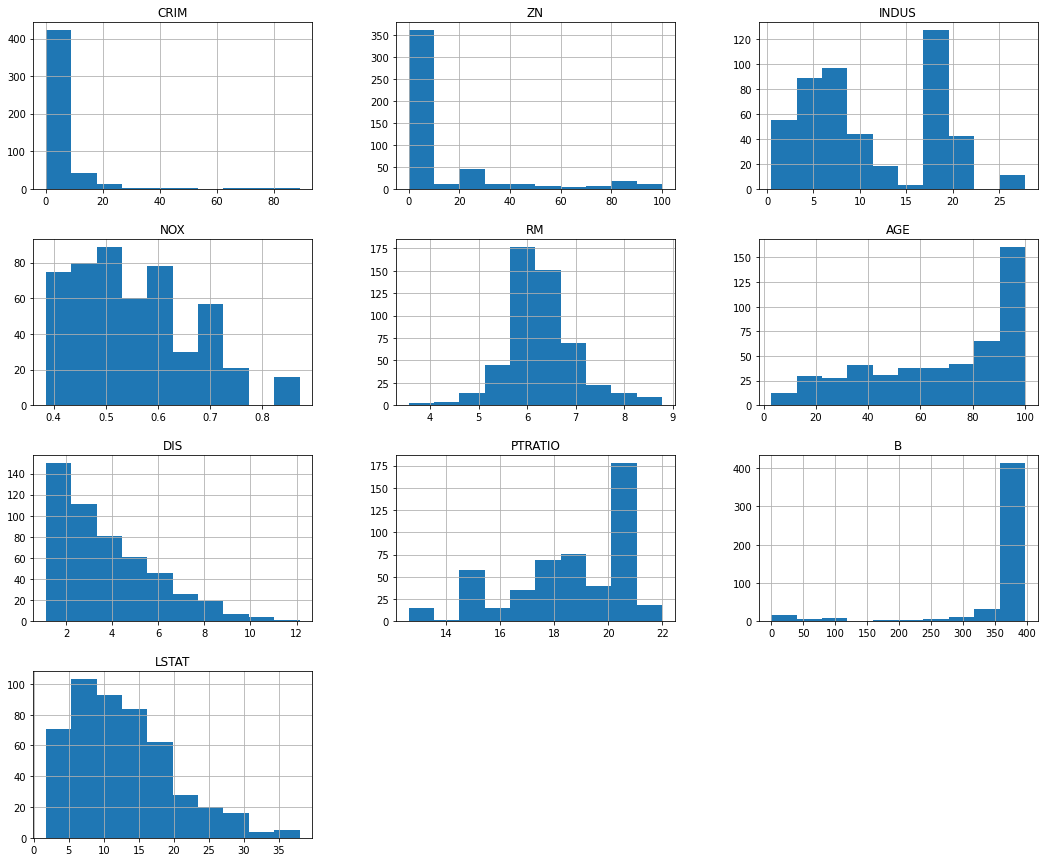

In [10]:
housing_data.hist(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT'], figsize=(18,15))
plt.show()

CRIM has outliers in it beyond point 40.

#Correlation matrix for Boston housing data

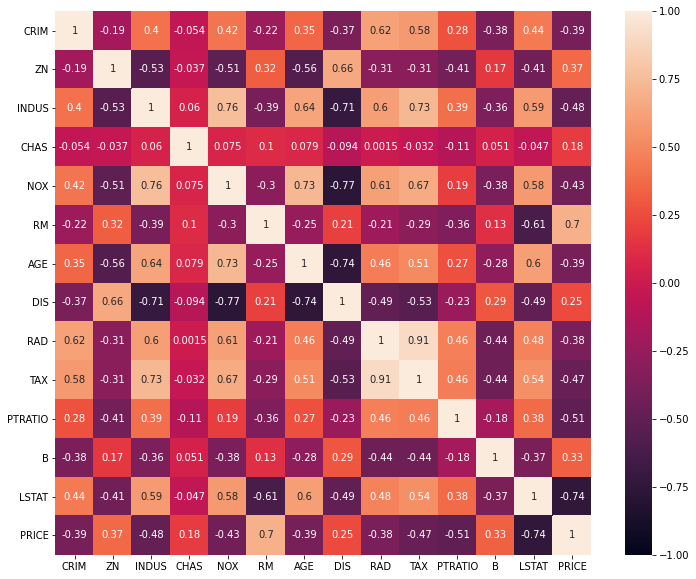

In [11]:
corr = housing_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0)
plt.show()

1.  RM has a strong positive correlation with PRICE where as LSTAT has a high negative correlation with PRICE.
2.  The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other.
3. The features DIS and AGE also have a strong correlation of -0.75.
4. CRIM is strongly associated with variables RAD and TAX.
5. INDUS is strongly correlated with NOX ,which shows that industrial areas has nitrogen oxides concentration.

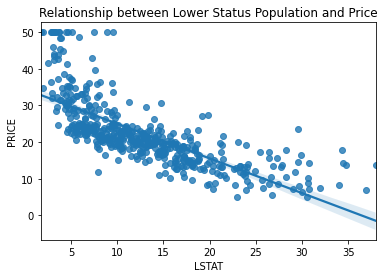

In [12]:
sns.regplot(y="PRICE",x="LSTAT", data=housing_data, fit_reg= True)
plt.title("Relationship between Lower Status Population and Price")
plt.show()

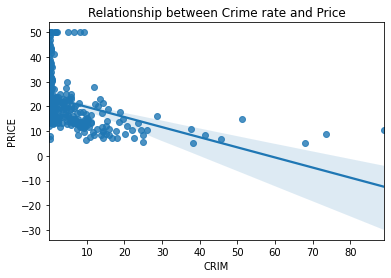

In [13]:
sns.regplot(y="PRICE",x="CRIM", data=housing_data, fit_reg= True)
plt.title("Relationship between Crime rate and Price")
plt.show()

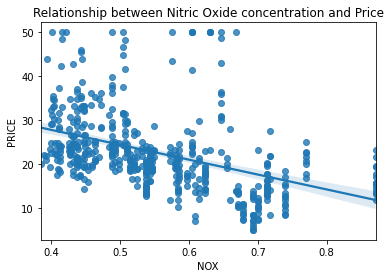

In [14]:
sns.regplot(y="PRICE",x="NOX", data=housing_data, fit_reg= True)
plt.title("Relationship between Nitric Oxide concentration and Price")
plt.show()

1)We can see a strong negative correlation between lower status population and price.
2)As Crime rate increases the rate of House decreases.
3)As Nitric Oxide concentration increases the rate of House decreases.

#Feature Selection for Boston housing data

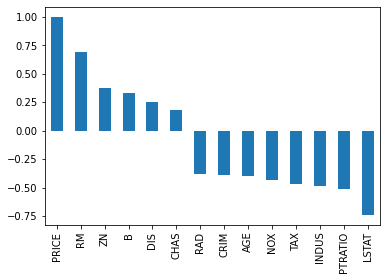

In [15]:
correlations = housing_data.corr()['PRICE'].sort_values(ascending=False)
correlations.plot(kind='bar')

In [16]:
print(correlations)

PRICE      1.000000
RM         0.695360
ZN         0.373136
B          0.333461
DIS        0.249929
CHAS       0.181391
RAD       -0.381626
CRIM      -0.391363
AGE       -0.394656
NOX       -0.427321
TAX       -0.468536
INDUS     -0.481772
PTRATIO   -0.507787
LSTAT     -0.735822
Name: PRICE, dtype: float64


In [17]:
print(abs(correlations) >= 0.40)

PRICE       True
RM          True
ZN         False
B          False
DIS        False
CHAS       False
RAD        False
CRIM       False
AGE        False
NOX         True
TAX         True
INDUS       True
PTRATIO     True
LSTAT       True
Name: PRICE, dtype: bool


These featurs are effecting the target variable:
'RM', 'NOX', 'TAX', 'INDUS', 'PTRATIO', 'LSTAT'.
 

#Handling missing values of Boston housing data

In [18]:
housing_data["CRIM"] = housing_data["CRIM"].replace(np.nan,housing_data["CRIM"].median())
housing_data["ZN"] = housing_data["ZN"].replace(np.nan,housing_data["ZN"].median())
housing_data["INDUS"] = housing_data["INDUS"].replace(np.nan,housing_data["INDUS"].mean()) 
housing_data["CHAS"] = housing_data["CHAS"].replace(np.nan,housing_data["CHAS"].median())
housing_data["AGE"] = housing_data["AGE"].replace(np.nan,housing_data["AGE"].median())
housing_data["LSTAT"] = housing_data["LSTAT"].replace(np.nan,housing_data["LSTAT"].median())

In [19]:
#housing_data.CHAS = housing_data.CHAS.astype(int)

#Machine learning

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
X = housing_data.drop('PRICE',axis = 1)
Y = housing_data['PRICE']

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [22]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn import linear_model, metrics
regressor = LinearRegression()
regressor.fit(X_train,Y_train)
regressor_predict = regressor.predict(X_test)
accuracy = regressor.score(X_test,Y_test)
print('Accuracy of the model:',accuracy*100,'%' )

Accuracy of the model: 65.91122999377292 %


In [23]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", (round(sm.mean_absolute_error(Y_test, regressor_predict), 2)))
print("Mean squared error(MSE) =", (round(sm.mean_squared_error(Y_test, regressor_predict), 2)))
print("Median absolute error =", (round(sm.median_absolute_error(Y_test, regressor_predict), 2)))
print("Explain variance score =",( round(sm.explained_variance_score(Y_test, regressor_predict), 2)))
print("R2 score =", (round(sm.r2_score(Y_test, regressor_predict), 2)))

Regressor model performance:
Mean absolute error(MAE) = 3.15
Mean squared error(MSE) = 25.0
Median absolute error = 2.25
Explain variance score = 0.66
R2 score = 0.66


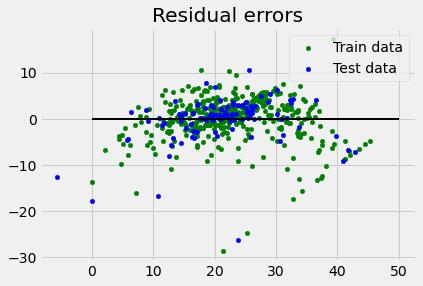

In [24]:
plt.style.use('fivethirtyeight')
plt.scatter(regressor.predict(X_train), regressor.predict(X_train) - Y_train, color = "green", s = 20, label = 'Train data')
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - Y_test, color = "blue", s = 20, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()